## Training Support Vector Machine

O Support Vector Machine (SVM) é um algoritmo de Machine Learning supervisionado usado tanto para classificação quanto para regressão, embora seja mais comum em tarefas de classificação. A principal ideia do SVM é encontrar o hiperplano ótimo que melhor separa as classes de dados no espaço de características. Esse hiperplano é escolhido de forma a maximizar a margem, ou seja, a distância entre o hiperplano e os pontos de dados mais próximos de cada classe, conhecidos como vetores de suporte. O SVM pode ser linear, mas também é capaz de lidar com dados não linearmente separáveis utilizando o truque do kernel, que transforma o espaço original em um espaço de dimensões mais altas onde a separação é possível.

<table>
        <thead>
            <tr>
                <th rowspan="2">Modelo</th>
                <th rowspan="2">Acurácia</th>
                <th colspan="3">Precisão</th>
                <th colspan="3">Recall</th>
                <th colspan="3">F1-Score</th>
            </tr>
            <tr>
                <th>Classe 0</th>
                <th>Classe 1</th>
                <th>Classe 2</th>
                <th>Classe 0</th>
                <th>Classe 1</th>
                <th>Classe 2</th>
                <th>Classe 0</th>
                <th>Classe 1</th>
                <th>Classe 2</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>SVM - All</td>
                <td>96%</td>
                <td>1.00</td>
                <td>0.77</td>
                <td>0.84</td>
                <td>0.96</td>
                <td>1.00</td>
                <td>1.00</td>
                <td>0.98</td>
                <td>0.87</td>
                <td>0.91</td>
            </tr>
            <tr>
                <td>SVM - Selected</td>
                <td>96%</td>
                <td>1.00</td>
                <td>0.77</td>
                <td>0.84</td>
                <td>0.96</td>
                <td>1.00</td>
                <td>1.00</td>
                <td>0.98</td>
                <td>0.87</td>
                <td>0.91</td>
            </tr>
</table>

### Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

In [2]:
output_dir = '../images'
os.makedirs(output_dir, exist_ok=True)

In [3]:
def save_plot(fig, filename):
    file_path = os.path.join(output_dir, filename)
    fig.savefig(file_path, bbox_inches='tight')
    print(f'Imagem salva como {file_path}')

### Recovering the data

In [4]:
import pandas as pd

In [5]:
ML_ROOT_DIR = "../../ml-models"
FOLDER_ID = "dataset"
LDD_PATH = os.path.join(ML_ROOT_DIR, FOLDER_ID)

In [6]:
train_data = pd.read_csv(os.path.join(LDD_PATH, 'ldd_train_resampled.csv'))

In [7]:
train_data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,60,5.0,70,8.1,8.6,3.5,1.8,5.3,1.6,29.0,0
1,1,55,2.6,48,11.8,5.1,1.2,1.0,3.6,0.5,33.0,0
2,1,51,10.4,76,7.3,3.3,2.0,1.0,1.2,0.9,33.0,0
3,0,77,5.0,106,5.4,3.9,2.1,1.2,4.2,1.1,24.0,2
4,1,54,6.8,73,7.5,5.1,2.0,1.3,1.4,1.5,39.0,0


In [8]:
test_data = pd.read_csv(os.path.join(LDD_PATH, 'ldd_test.csv'))

In [9]:
test_data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,1,52,5.3,56,8.8,5.3,2.5,1.1,2.3,1.1,29.0,0
1,0,60,3.0,42,6.2,5.8,0.9,1.0,4.4,0.4,27.0,0
2,1,52,3.0,60,7.0,3.8,3.2,0.8,1.7,1.4,33.0,0
3,1,45,4.3,71,7.2,5.6,2.0,1.1,3.0,1.0,19.0,0
4,0,30,3.0,42,4.1,4.9,1.3,1.2,3.2,0.5,22.0,2


In [10]:
X_train = train_data.drop(columns=['CLASS'])
y_train = train_data['CLASS']

In [11]:
X_test = test_data.drop(columns=['CLASS'])
y_test = test_data['CLASS']

### Training with all features

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [13]:
model = SVC(kernel='linear', random_state=42) 
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [14]:
y_pred = model.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.4f}")

Acurácia: 0.9600


In [16]:
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       169
           1       0.77      1.00      0.87        10
           2       0.83      0.95      0.89        21

    accuracy                           0.96       200
   macro avg       0.87      0.97      0.91       200
weighted avg       0.97      0.96      0.96       200



In [17]:
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Matriz de Confusão:
[[162   3   4]
 [  0  10   0]
 [  1   0  20]]


In [18]:
param_grid = {
  'C': [0.1, 1, 10],
  'gamma': ['scale', 'auto', 0.1, 1],
  'kernel': ['rbf', 'linear'],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [19]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

Melhores parâmetros encontrados:
{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [20]:
best_params_model = grid_search.best_estimator_

In [21]:
y_pred_best = best_params_model.predict(X_test)
print(f"Acurácia do modelo otimizado: {accuracy_score(y_test, y_pred_best):.4f}")
print(classification_report(y_test, y_pred_best))

Acurácia do modelo otimizado: 0.9650
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       169
           1       0.77      1.00      0.87        10
           2       0.84      1.00      0.91        21

    accuracy                           0.96       200
   macro avg       0.87      0.99      0.92       200
weighted avg       0.97      0.96      0.97       200



In [22]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_best)

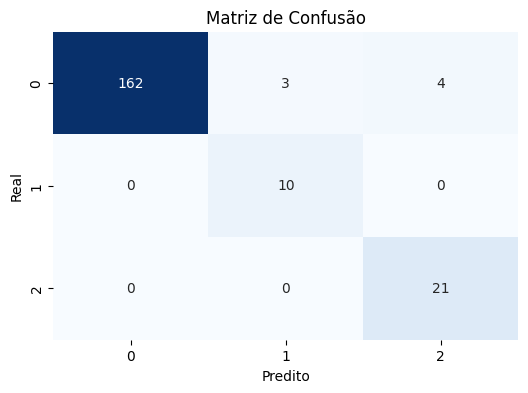

In [23]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

#### Applying cross-validation

In [24]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

In [25]:
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'), 
    'f1': make_scorer(f1_score, average='macro')
}

In [26]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [27]:
scores = cross_validate(best_params_model, X_train, y_train, cv=skf, scoring=scoring)

In [28]:
print('Acurácia:', scores['test_accuracy'])
print('Precisão:', scores['test_precision'])
print('Recall:', scores['test_recall'])
print('F1-Score:', scores['test_f1'])

Acurácia: [0.95566502 0.96551724 0.99507389 0.96551724 0.98029557 0.97524752
 0.97029703 0.98514851 0.98019802 0.98514851]
Precisão: [0.95637265 0.96750711 0.99509804 0.96807101 0.98101353 0.97657952
 0.97162978 0.98557423 0.98081435 0.98550725]
Recall: [0.9555897  0.96568627 0.99509804 0.96568627 0.98039216 0.97512438
 0.97014925 0.98507463 0.9800995  0.98507463]
F1-Score: [0.95553132 0.96518985 0.99506173 0.9653585  0.98023561 0.97508716
 0.96988149 0.98506636 0.98001071 0.98503136]


In [29]:
print(f'\nMédia de Acurácia: {scores["test_accuracy"].mean():.4f} ± {scores["test_accuracy"].std():.4f}')
print(f'Média de Precisão: {scores["test_precision"].mean():.4f} ± {scores["test_precision"].std():.4f}')
print(f'Média de Recall: {scores["test_recall"].mean():.4f} ± {scores["test_recall"].std():.4f}')
print(f'Média de F1-Score: {scores["test_f1"].mean():.4f} ± {scores["test_f1"].std():.4f}')


Média de Acurácia: 0.9758 ± 0.0111
Média de Precisão: 0.9768 ± 0.0106
Média de Recall: 0.9758 ± 0.0111
Média de F1-Score: 0.9756 ± 0.0112


In [30]:
import joblib
joblib.dump(best_params_model, '../models/SVM_model.joblib')

['../models/SVM_model.joblib']

### Training with the best features

In [31]:
from sklearn.feature_selection import SelectKBest, f_classif

In [32]:
k_values = range(1, X_train.shape[1] + 1)
accuracy_scores = []
selected_features_dict = {}

for k in k_values:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    model = SVC()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

    selected_features_indices = np.where(selector.get_support())[0]

    if hasattr(X_train, 'columns'):
        selected_features_dict[k] = X_train.columns[selected_features_indices].tolist()
    else:
        selected_features_dict[k] = selected_features_indices.tolist()

In [33]:
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Melhor número de características: {best_k}")

Melhor número de características: 3


In [34]:
selector_best = SelectKBest(score_func=f_classif, k=best_k)
X_train_selected = selector_best.fit_transform(X_train, y_train)
X_test_selected = selector_best.transform(X_test)

In [35]:
print("Características selecionadas para o melhor k:")
print(selected_features_dict[best_k])

Características selecionadas para o melhor k:
['AGE', 'HbA1c', 'BMI']


In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

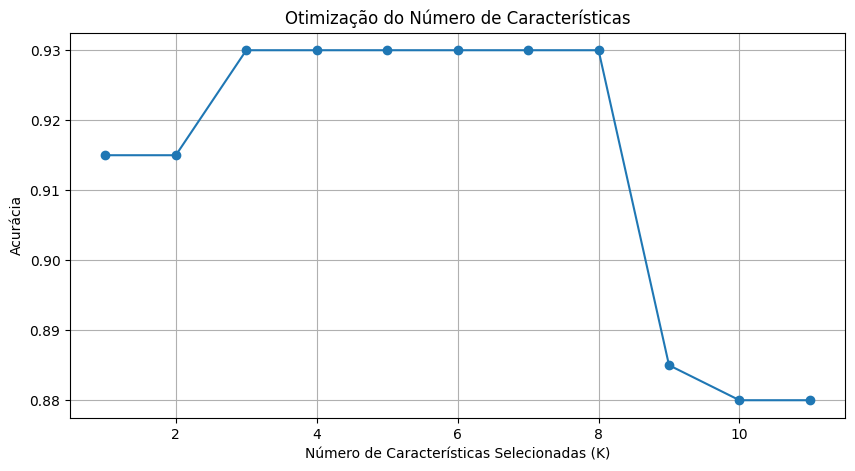

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.xlabel('Número de Características Selecionadas (K)')
plt.ylabel('Acurácia')
plt.title('Otimização do Número de Características')
plt.grid()
plt.show()

In [38]:
model_k = SVC(random_state=42)
model_k.fit(X_train_selected, y_train)

SVC(random_state=42)

In [39]:
y_pred = model_k.predict(X_test_selected)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.4f}")

Acurácia: 0.9300


In [41]:
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       169
           1       0.48      1.00      0.65        10
           2       0.87      0.95      0.91        21

    accuracy                           0.93       200
   macro avg       0.78      0.96      0.84       200
weighted avg       0.96      0.93      0.94       200



In [42]:
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Matriz de Confusão:
[[156  10   3]
 [  0  10   0]
 [  0   1  20]]


In [43]:
param_grid = {
  'C': [0.1, 1, 10],
  'gamma': ['scale', 'auto', 0.1, 1],
  'kernel': ['rbf', 'linear'],	
}

grid_search = GridSearchCV(estimator=model_k, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_selected, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

In [44]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

Melhores parâmetros encontrados:
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [45]:
best_model_k = grid_search.best_estimator_

In [46]:
y_pred_best = best_model_k.predict(X_test_selected)
print(f"Acurácia do modelo otimizado: {accuracy_score(y_test, y_pred_best):.4f}")
print(classification_report(y_test, y_pred_best))

Acurácia do modelo otimizado: 0.9700
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       169
           1       0.91      1.00      0.95        10
           2       0.81      1.00      0.89        21

    accuracy                           0.97       200
   macro avg       0.91      0.99      0.94       200
weighted avg       0.98      0.97      0.97       200



In [47]:
joblib.dump(best_model_k, '../models/SVM_KBest_model.joblib')

['../models/SVM_KBest_model.joblib']

In [48]:
cm = confusion_matrix(y_test, y_pred_best)

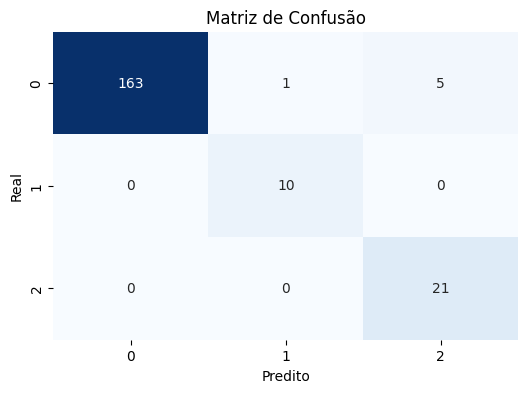

In [49]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

#### Applying cross-validation

In [50]:
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'), 
    'f1': make_scorer(f1_score, average='macro')
}

In [51]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [52]:
scores = cross_validate(best_model_k, X_train_selected, y_train, cv=skf, scoring=scoring)

In [53]:
print('Acurácia:', scores['test_accuracy'])
print('Precisão:', scores['test_precision'])
print('Recall:', scores['test_recall'])
print('F1-Score:', scores['test_f1'])

Acurácia: [0.98522167 0.97044335 0.99507389 0.97536946 0.98522167 0.96039604
 0.97524752 0.98019802 0.99009901 0.98019802]
Precisão: [0.98550107 0.97142274 0.99509804 0.97598344 0.98550107 0.9622363
 0.97657952 0.98081435 0.99047619 0.98081232]
Recall: [0.98522095 0.97051507 0.99509804 0.97541703 0.98522095 0.96027217
 0.97512438 0.9800995  0.99004975 0.98017267]
F1-Score: [0.98521883 0.97027919 0.99506173 0.97526415 0.98521883 0.96014907
 0.97508716 0.98001071 0.99011858 0.98016518]


In [54]:
print(f'\nMédia de Acurácia: {scores["test_accuracy"].mean():.4f} ± {scores["test_accuracy"].std():.4f}')
print(f'Média de Precisão: {scores["test_precision"].mean():.4f} ± {scores["test_precision"].std():.4f}')
print(f'Média de Recall: {scores["test_recall"].mean():.4f} ± {scores["test_recall"].std():.4f}')
print(f'Média de F1-Score: {scores["test_f1"].mean():.4f} ± {scores["test_f1"].std():.4f}')


Média de Acurácia: 0.9797 ± 0.0095
Média de Precisão: 0.9804 ± 0.0090
Média de Recall: 0.9797 ± 0.0095
Média de F1-Score: 0.9797 ± 0.0096
